In [24]:
#Importar los recursos requeridos
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Estimators
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [25]:
datos = pd.read_csv('C:\\Users\\hugo.brenes\\Documents\\Python\\hour.csv', header=0)

In [26]:
# Validar los encabezados que se hayan importado bien 
datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
#describe the data set with its fields
datos.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [28]:
##Correlation 
corrMat = datos.corr()
corrMat

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [29]:
print (datos)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [30]:
new=datos[['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'casual', 'registered', 'cnt']]

In [31]:
print(new)

       instant  season  yr  mnth  hr  holiday  weekday  workingday  casual  \
0            1       1   0     1   0        0        6           0       3   
1            2       1   0     1   1        0        6           0       8   
2            3       1   0     1   2        0        6           0       5   
3            4       1   0     1   3        0        6           0       3   
4            5       1   0     1   4        0        6           0       0   
...        ...     ...  ..   ...  ..      ...      ...         ...     ...   
17374    17375       1   1    12  19        0        1           1      11   
17375    17376       1   1    12  20        0        1           1       8   
17376    17377       1   1    12  21        0        1           1       7   
17377    17378       1   1    12  22        0        1           1      13   
17378    17379       1   1    12  23        0        1           1      12   

       registered  cnt  
0              13   16  
1            

In [32]:
##Correlation 
corrMat = new.corr()
corrMat

,instant,season,yr,mnth,hr,holiday,weekday,workingday,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,-0.300942,0.134326,0.030284
casual,0.158295,0.120206,0.142779,0.068457,0.301202,0.031564,0.032721,-0.300942,1.000000,0.506618,0.694564
registered,0.282046,0.174226,0.253684,0.122273,0.374141,-0.047345,0.021578,0.134326,0.506618,1.000000,0.972151


<function matplotlib.pyplot.plotting()>

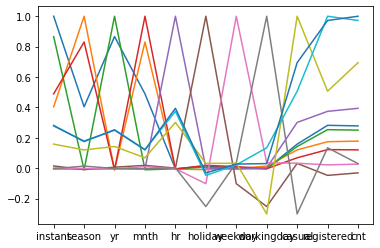

In [33]:
#Imprimir la matriz de correlacion
plt.plot(corrMat)
plt.plotting

In [34]:
#Feature Selection
features = new.iloc[:, 1:23]
print('Summary of features sample')
features.head

Summary of features sample


<bound method NDFrame.head of        season  yr  mnth  hr  holiday  weekday  workingday  casual  registered  \
0           1   0     1   0        0        6           0       3          13   
1           1   0     1   1        0        6           0       8          32   
2           1   0     1   2        0        6           0       5          27   
3           1   0     1   3        0        6           0       3          10   
4           1   0     1   4        0        6           0       0           1   
...       ...  ..   ...  ..      ...      ...         ...     ...         ...   
17374       1   1    12  19        0        1           1      11         108   
17375       1   1    12  20        0        1           1       8          81   
17376       1   1    12  21        0        1           1       7          83   
17377       1   1    12  22        0        1           1      13          48   
17378       1   1    12  23        0        1           1      12          37  

In [35]:
#dependent variable
depVar = new['weekday']

In [36]:
X_train = (features[: 1000])
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,casual,registered,cnt
0,1,0,1,0,0,6,0,3,13,16
1,1,0,1,1,0,6,0,8,32,40
2,1,0,1,2,0,6,0,5,27,32
3,1,0,1,3,0,6,0,3,10,13
4,1,0,1,4,0,6,0,0,1,1


In [37]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    6
1    6
2    6
3    6
4    6
Name: weekday, dtype: int64

In [38]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       season  yr  mnth  hr  holiday  weekday  workingday  casual  registered  \
17279       1   1    12  20        0        4           1      12          79   
17280       1   1    12  21        0        4           1      12          51   
17281       1   1    12  22        0        4           1      11          33   
17282       1   1    12  23        0        4           1       2          24   
17283       1   1    12   0        0        5           1       3          22   

       cnt  
17279   91  
17280   63  
17281   44  
17282   26  
17283   25  


In [39]:
#Ground Truth (y_test) 
y_test = depVar[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


16379    2
16380    2
16381    2
16382    2
16383    2
Name: weekday, dtype: int64

In [40]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [41]:
X_train.shape, X_test.shape

((750, 10), (250, 10))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 10), (188, 10))

In [43]:
#Models
modelSVC = SVC()
modelRFC = RandomForestClassifier()
modelLR = LinearRegression()

In [44]:
#dependent variable
print(depVar)

0        6
1        6
2        6
3        6
4        6
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: weekday, Length: 17379, dtype: int64


In [45]:
#Random Forest
modelRFC.fit(X_train,y_train)

C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
#SVN 
modelSVC.fit(X_train,y_train)

C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# Validar los rendimientos del modelo RF
print(cross_val_score(modelRFC, X_train, y_train))

[0.95238095 0.98930481 0.93010753]


C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [49]:
# Validar SVC
print(cross_val_score(modelSVC, X_train, y_train))

[0.39153439 0.42780749 0.40860215]


C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugo.br

In [50]:
modelSVC.score(X_train,y_train)

0.9715302491103203

In [51]:
modelLR.score(X_train,y_train)

1.0

In [52]:
#Model Fitting SVC
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugo.br

[0.39153439 0.42780749 0.40860215]


0.9715302491103203

In [53]:
predictions = modelSVC.predict(X_test)
#print(predictions)

In [54]:
#Obtener RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

2.1087457197676294


In [55]:
predRsquared = r2_score(y_test,predictions)
print(predRsquared)

-0.007571143749158571


In [56]:
#Make Predictions on Test Data
predictions = modelSVC.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.008
RMSE: 2.109


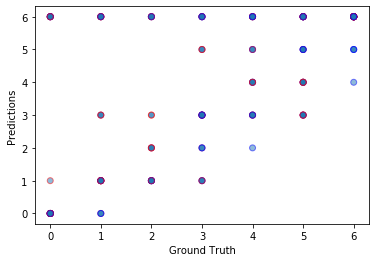

In [57]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.86


In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.58
Accuracy of K-NN classifier on test set: 0.36


In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.34
Accuracy of LDA classifier on test set: 0.29


C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [64]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.44


C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  5  1  1  0  0  4]
 [ 6  8  6  1  2  2  0]
 [ 3 11  6  0  0  0  0]
 [ 0  7  4 10  1  3  1]
 [ 1  4  3  4  4  5  1]
 [ 2  4  6  4  7  4  5]
 [ 1  2  1  2  3  7 19]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.20      0.32      0.24        25
           2       0.22      0.30      0.26        20
           3       0.45      0.38      0.42        26
           4       0.24      0.18      0.21        22
           5       0.19      0.12      0.15        32
           6       0.63      0.54      0.58        35

    accuracy                           0.36       188
   macro avg       0.36      0.35      0.35       188
weighted avg       0.37      0.36      0.36       188



In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[18  1  0  0  0  0  9]
 [ 3 11  0  3  0  0  8]
 [ 0  8  4  2  0  0  6]
 [ 0  4  3  9  0  3  7]
 [ 0  0  1  5  5  3  8]
 [ 0  0  0  6  7  5 14]
 [ 0  0  0  0  1  3 31]]
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.46      0.44      0.45        25
           2       0.50      0.20      0.29        20
           3       0.36      0.35      0.35        26
           4       0.38      0.23      0.29        22
           5       0.36      0.16      0.22        32
           6       0.37      0.89      0.53        35

    accuracy                           0.44       188
   macro avg       0.47      0.41      0.41       188
weighted avg       0.47      0.44      0.42       188



In [67]:
data = pd.read_csv('C:\\Users\\hugo.brenes\\Documents\\Python\\hour.csv', header=0)

In [68]:
#Visualize the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [69]:
#describe the data set with its fields
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [70]:
# Information abount the variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [71]:
#Print the values
print (data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [72]:
# BackUp the DAtaSet
datos2 = data

In [73]:
# Define a function called Switchseason with 4 variables to lookup the id of the education
def Switchseason(argument):
    switcher = {
         1: "Invierno",
        2: "Primavera",
        3: "Verano",
        4: "Otoño",
    }
    return switcher.get(argument, "Nothing")

In [74]:
# Define a function called Switchmnth with 12 variables to lookup the id of the education
def Switchmnth(argument):
    switcher = {
         1: "Enero",
        2: "Febrero",
        3: "Marzo",
        4: "Abril",
        5: "Mayo",
        6: "Junio",
        7: "Julio",
        8: "Agosto",
        9: "Septiembre",
        10: "Octubre",
        11: "Noviembre",
        12: "Diciembre",
    }
    return switcher.get(argument, "Nothing")

In [75]:
# Define a function called Switchyr with 2 variables to lookup the id of the gender

def Switchyr(argument):
    switcher = {
         0: "2011",
        1: "2012",
    }
    return switcher.get(argument, "nothing")

In [76]:
# Define a function called Switchweekday with 7 variables to lookup the id of the education
def Switchweekday(argument):
    switcher = {
         0: "Lunes",
        1: "Martes",
        2: "Miercoles",
        3: "Jueves",
        4: "Viernes",
        5: "Sabado",
        6: "Domingo",
    }
    return switcher.get(argument, "Nothing")

In [77]:
# Define a function called Switchworkingday with 2 variables to lookup the id of the gender

def Switchworkingday(argument):
    switcher = {
         0: "Laborable",
        1: "Descanso",
    }
    return switcher.get(argument, "nothing")

In [78]:
# Create the dictionary 
año_dictionary ={0 : '2011', 1 : '2012'}

In [79]:
# Create a new field to backup the sex status id.
datos2['yr'] = datos2['yr'].map(año_dictionary)

In [80]:
# Create the dictionary 
trab_dictionary ={0 : 'Laborable', 1 : 'Descanso'}

In [81]:
# Create a new field to backup the sex status id.
datos2['workingday'] = datos2['workingday'].map(trab_dictionary)

In [82]:
# Create the dictionary 
temp_dictionary ={1 : 'Invierno', 2 : 'Primavera', 3 : 'Verano', 4 : 'Otoño'}

In [83]:
# Create a new field to backup the sex status id.
datos2['season'] = datos2['season'].map(temp_dictionary)

In [84]:
# Create the dictionary 
clima_dictionary ={1 : 'despejado', 2 : 'nubaldo', 3 : 'Lluvia_ligera', 4 : 'Lluvia_Intensa'}

In [85]:
# Create a new field to backup the sex status id.
datos2['weathersit'] = datos2['weathersit'].map(clima_dictionary)

In [86]:
# Create the dictionary 
mes_dictionary ={1 : 'Enero', 2 : 'Febrero', 3 : 'Marzo', 4 : 'Abril', 5 : 'Mayo', 6 : 'Junio', 7 : 'Julio', 8 : 'Agosto', 9 : 'Septiembre', 10 : 'Octubre', 11 : 'Noviembre', 12 : 'Diciembre'}

In [87]:
# Create a new field to backup the sex status id.
datos2['mnth'] = datos2['mnth'].map(mes_dictionary)

In [88]:
# Create the dictionary 
dia_dictionary ={0 : 'Lunes', 1 : 'Martes', 2 : 'Miercoles', 3 : 'Jueves', 4 : 'Viernes', 5 : 'Sabado',  6 : 'Domingo',}

In [89]:
# Create a new field to backup the sex status id.
datos2['weekday'] = datos2['weekday'].map(dia_dictionary)

In [90]:
#Print the values
print (datos2)

       instant      dteday    season    yr       mnth  hr  holiday  weekday  \
0            1  2011-01-01  Invierno  2011      Enero   0        0  Domingo   
1            2  2011-01-01  Invierno  2011      Enero   1        0  Domingo   
2            3  2011-01-01  Invierno  2011      Enero   2        0  Domingo   
3            4  2011-01-01  Invierno  2011      Enero   3        0  Domingo   
4            5  2011-01-01  Invierno  2011      Enero   4        0  Domingo   
...        ...         ...       ...   ...        ...  ..      ...      ...   
17374    17375  2012-12-31  Invierno  2012  Diciembre  19        0   Martes   
17375    17376  2012-12-31  Invierno  2012  Diciembre  20        0   Martes   
17376    17377  2012-12-31  Invierno  2012  Diciembre  21        0   Martes   
17377    17378  2012-12-31  Invierno  2012  Diciembre  22        0   Martes   
17378    17379  2012-12-31  Invierno  2012  Diciembre  23        0   Martes   

      workingday weathersit  temp   atemp   hum  wi

In [91]:
# Print the dataset in the .csv
datos2.to_csv(r'C:\\Users\\hugo.brenes\\Documents\\Python\\hour5.csv')

In [92]:
# Check the Header
header = datos2.dtypes.index
print(header)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [93]:
datos1=datos2[['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'casual', 'registered', 'cnt']]

In [94]:
print (datos1)

       instant    season    yr       mnth  hr  holiday  weekday workingday  \
0            1  Invierno  2011      Enero   0        0  Domingo  Laborable   
1            2  Invierno  2011      Enero   1        0  Domingo  Laborable   
2            3  Invierno  2011      Enero   2        0  Domingo  Laborable   
3            4  Invierno  2011      Enero   3        0  Domingo  Laborable   
4            5  Invierno  2011      Enero   4        0  Domingo  Laborable   
...        ...       ...   ...        ...  ..      ...      ...        ...   
17374    17375  Invierno  2012  Diciembre  19        0   Martes   Descanso   
17375    17376  Invierno  2012  Diciembre  20        0   Martes   Descanso   
17376    17377  Invierno  2012  Diciembre  21        0   Martes   Descanso   
17377    17378  Invierno  2012  Diciembre  22        0   Martes   Descanso   
17378    17379  Invierno  2012  Diciembre  23        0   Martes   Descanso   

      weathersit  casual  registered  cnt  
0      despejado   

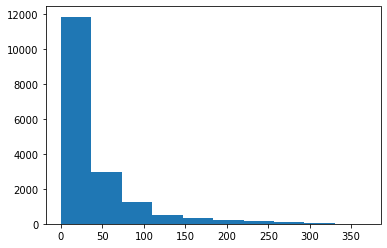

In [95]:
# create a char of the casual
plt.hist(datos1['casual'])
plt.show()

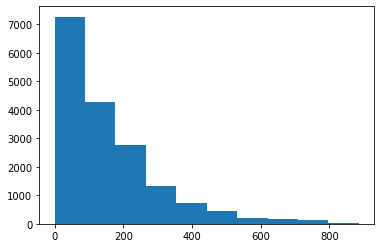

In [96]:
# create a char of the registered
plt.hist(datos1['registered'])
plt.show()

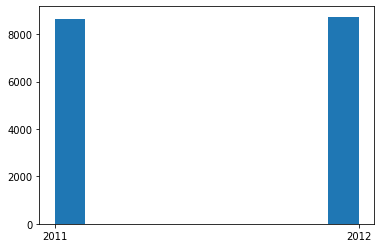

In [97]:
# create a char of the año
plt.hist(datos1['yr'])
plt.show()

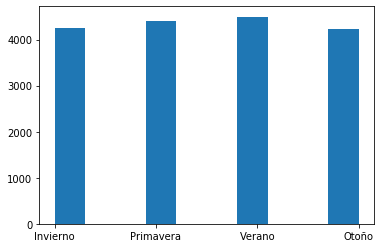

In [98]:
# create a char of the temporada
plt.hist(datos1['season'])
plt.show()

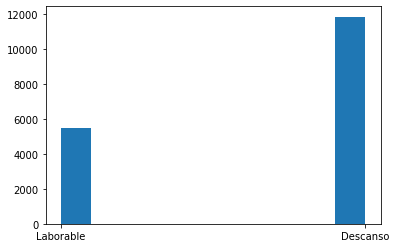

In [99]:
# create a char of the workingday
plt.hist(datos1['workingday'])
plt.show()

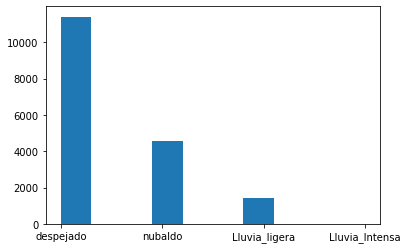

In [100]:
# create a char of the weathersit
plt.hist(datos1['weathersit'])
plt.show()

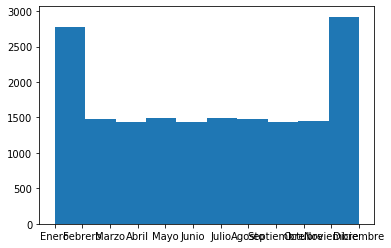

In [101]:
# create a char of the mnth
plt.hist(datos1['mnth'])
plt.show()

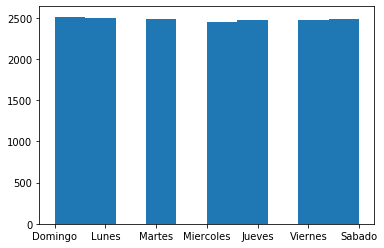

In [102]:
# create a char of the mnth
plt.hist(datos1['weekday'])
plt.show()

(array([15631.,  1281.,   401.,    66.]),
 array([  0.  ,  91.75, 183.5 , 275.25, 367.  ]),
 <a list of 4 Patch objects>)

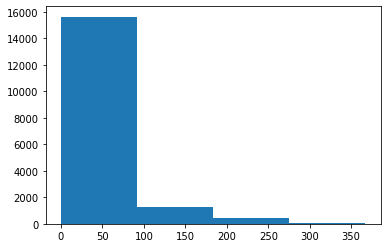

In [103]:
# create a char of the Limit_Bal
plt.hist(datos1['casual'], bins=4)

(array([13084.,  3289.,   760.,   246.]),
 array([  0. , 221.5, 443. , 664.5, 886. ]),
 <a list of 4 Patch objects>)

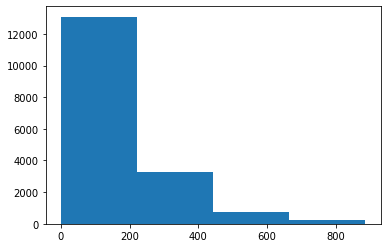

In [104]:
# create a char of the Limit_Bal
plt.hist(datos1['registered'], bins=4)

(array([4242., 4409., 4496., 4232.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

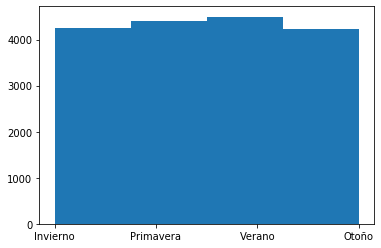

In [105]:
# create a char of the Limit_Bal
plt.hist(datos1['season'], bins=4)

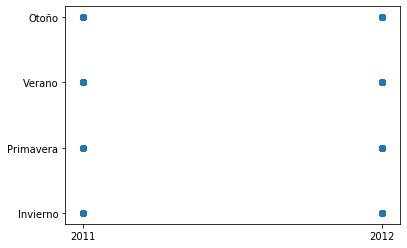

In [106]:
#Scatter Plots
x = datos1['yr']
y = datos1['season']
plt.scatter(x,y)
plt.show()

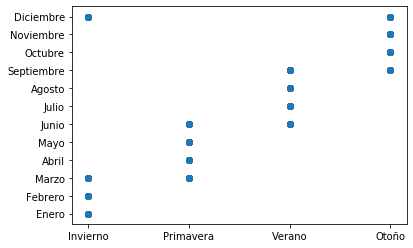

In [107]:
x = datos1['season']
y = datos1['mnth']
plt.scatter(x,y)
plt.show()

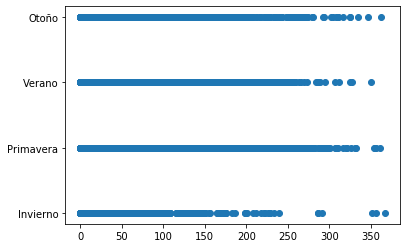

In [108]:
x = datos1['casual']
y = datos1['season']
plt.scatter(x,y)
plt.show()

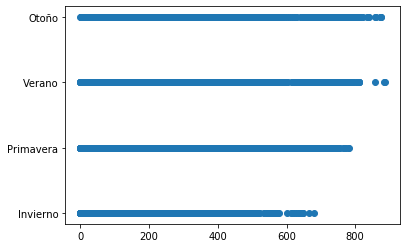

In [109]:
x = datos1['registered']
y = datos1['season']
plt.scatter(x,y)
plt.show()

In [110]:
datos1.groupby('season')['season'].count()

season
Invierno     4242
Otoño        4232
Primavera    4409
Verano       4496
Name: season, dtype: int64

In [111]:
datos1.groupby('casual')['casual'].count()

casual
0      1581
1      1082
2       798
3       697
4       561
       ... 
356       1
357       1
361       1
362       1
367       1
Name: casual, Length: 322, dtype: int64

In [112]:
datos1.groupby('registered')['registered'].count()

registered
0       24
1      201
2      245
3      294
4      307
      ... 
860      1
871      1
876      2
885      1
886      1
Name: registered, Length: 776, dtype: int64

C:\Users\hugo.brenes\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


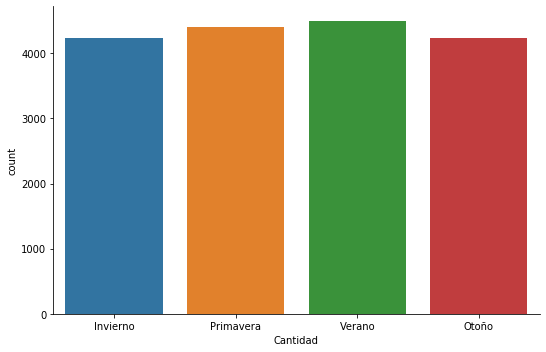

In [113]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.factorplot('season', data=datos1, kind='count', aspect=1.5)
fg.set_xlabels('Cantidad')

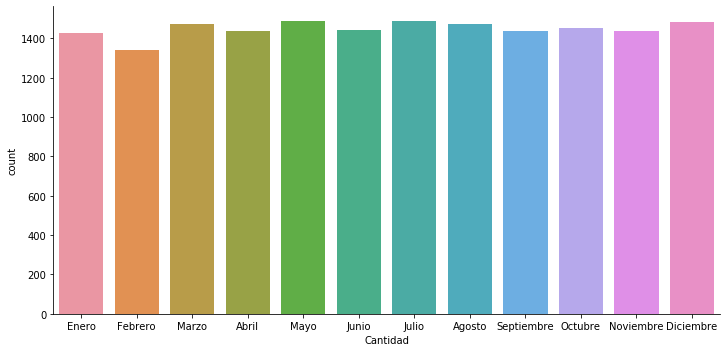

In [114]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.factorplot('mnth', data=datos1, kind='count', aspect=2)
fg.set_xlabels('Cantidad')

In [115]:
# Pivot Table 
datos1.pivot_table('yr','casual', aggfunc=np.sum, margins=True)

,yr
casual,
0,2011201120112011201120112011201120112011201120...
1,2011201120112011201120112011201120112011201120...
2,2011201120112011201120112011201120112011201120...
3,2011201120112011201120112011201120112011201120...
4,2011201120112011201120112011201120112011201120...
...,...
357,2012
361,2012
362,2012


In [116]:
##Correlation 
corrMat = datos1.corr()
corrMat

,instant,hr,holiday,casual,registered,cnt
instant,1.000000,-0.004775,0.014723,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,0.000479,0.301202,0.374141,0.394071
holiday,0.014723,0.000479,1.000000,0.031564,-0.047345,-0.030927
casual,0.158295,0.301202,0.031564,1.000000,0.506618,0.694564
registered,0.282046,0.374141,-0.047345,0.506618,1.000000,0.972151
cnt,0.278379,0.394071,-0.030927,0.694564,0.972151,1.000000


<function matplotlib.pyplot.plotting()>

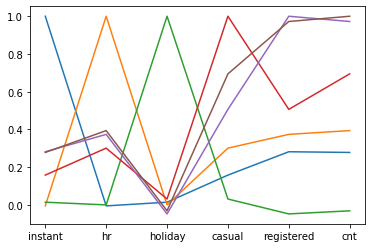

In [117]:
#Imprimir la matriz de correlacion
plt.plot(corrMat)
plt.plotting

In [118]:
#Feature Selection
features = datos1.iloc[:, 1:23]
print('Summary of features sample')
features.head

Summary of features sample


<bound method NDFrame.head of          season    yr       mnth  hr  holiday  weekday workingday weathersit  \
0      Invierno  2011      Enero   0        0  Domingo  Laborable  despejado   
1      Invierno  2011      Enero   1        0  Domingo  Laborable  despejado   
2      Invierno  2011      Enero   2        0  Domingo  Laborable  despejado   
3      Invierno  2011      Enero   3        0  Domingo  Laborable  despejado   
4      Invierno  2011      Enero   4        0  Domingo  Laborable  despejado   
...         ...   ...        ...  ..      ...      ...        ...        ...   
17374  Invierno  2012  Diciembre  19        0   Martes   Descanso    nubaldo   
17375  Invierno  2012  Diciembre  20        0   Martes   Descanso    nubaldo   
17376  Invierno  2012  Diciembre  21        0   Martes   Descanso  despejado   
17377  Invierno  2012  Diciembre  22        0   Martes   Descanso  despejado   
17378  Invierno  2012  Diciembre  23        0   Martes   Descanso  despejado   

       ca